In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
labels = ['Atelectasis',
            'Cardiomegaly',
            'Effusion',
            'Infiltration',
            'Mass',
            'Nodule',
            'Pneumonia',
            'Pneumothorax',
            'Consolidation',
            'Edema',
            'Emphysema',
            'Fibrosis',
            'Pleural_Thickening',
                'Hernia']

In [38]:
"""
Load Validation labels for 10% and Full dataset
"""
df_val = pd.read_csv('val-small_0.1.csv')
df_val_fd = pd.read_csv('val_1.csv')


In [39]:
"""
Load Predictions for all Models , Training and Validation for Models that used Full Dataset
"""
df_scnn_pred = pd.read_csv('./SimpleCNNSGD/SimpleCNNpreds.csv')
df_scnn_mom_pred = pd.read_csv('./SimpleCNNSGDMom/SimpleCNNpredsWithMom.csv')
df_resnet_pred = pd.read_csv('./ResNetSGD/ResNetpreds.csv')
df_resnet_mom_pred = pd.read_csv('./ResNetSGDMom/ResNetpredsSGDMomentum.csv')
df_densenet_pred = pd.read_csv('./DenseNetSGD/DenseNetpreds.csv')
df_densenet_mom_pred = pd.read_csv('./DenseNetSGDMom/DenseNetpredsSGDMomentum.csv')
df_resnet_fd_pred = pd.read_csv('./ResNet/ResNetpredsSGDMomentum.csv')
df_densenet_fd_pred = pd.read_csv('./DenseNet/DenseNetpredsSGDMomentum.csv')



In [42]:
"""
Merge Prediction with Labels for calculating AUC ROC
"""
df_scnn_merged = df_val.merge(df_scnn_pred, on='Image Index')
df_scnn_mom_merged = df_val.merge(df_scnn_mom_pred, on='Image Index')
df_resnet_merged = df_val.merge(df_resnet_pred, on='Image Index')
df_resnet_mom_merged = df_val.merge(df_resnet_mom_pred, on='Image Index')
df_densenet_merged = df_val.merge(df_densenet_pred, on='Image Index')
df_densenet_mom_merged = df_val.merge(df_densenet_mom_pred, on='Image Index')
df_resnet_fd_merged = df_val_fd.merge(df_resnet_fd_pred, on='Image Index')
df_densenet_fd_merged = df_val_fd.merge(df_densenet_fd_pred, on='Image Index')


# Simple CNN ROC
use the merged dataframe and get True positive rate and False positive rate

In [46]:
fpr_scnn = dict()
tpr_scnn = dict()
roc_auc_scnn = dict()

In [47]:
for label in labels:
    fpr_scnn[label], tpr_scnn[label], _ = roc_curve(df_scnn_merged[[label]].to_numpy(),df_scnn_merged[["prob_" + label]].to_numpy())
    roc_auc_scnn[label] = auc(fpr_scnn[label], tpr_scnn[label])
    

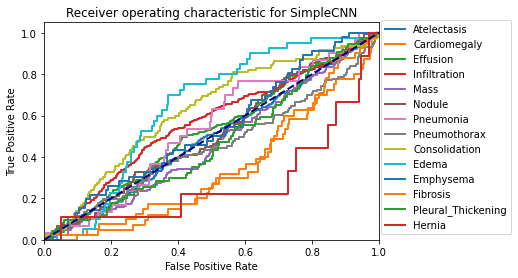

In [48]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_scnn[l], tpr_scnn[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SimpleCNN')
plt.show()

# Simple CNN SGD Momentum ROC
use the merged dataframe and get True positive rate and False positive rate

In [49]:
fpr_scnn_mom = dict()
tpr_scnn_mom = dict()
roc_auc_scnn_mom = dict()

In [50]:
for label in labels:
    fpr_scnn_mom[label], tpr_scnn_mom[label], _ = roc_curve(df_scnn_mom_merged[[label]].to_numpy(),df_scnn_mom_merged[["prob_" + label]].to_numpy())
    roc_auc_scnn_mom[label] = auc(fpr_scnn_mom[label], tpr_scnn_mom[label])

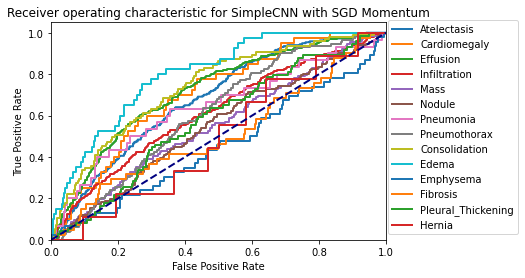

In [51]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_scnn_mom[l], tpr_scnn_mom[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SimpleCNN with SGD Momentum')
plt.show()

# ResNet ROC
use the merged dataframe and get True positive rate and False positive rate

In [52]:
fpr_resnet = dict()
tpr_resnet = dict()
roc_auc_resnet = dict()

In [53]:
for label in labels:
    fpr_resnet[label], tpr_resnet[label], _ = roc_curve(df_resnet_merged[[label]].to_numpy(),df_resnet_merged[["prob_" + label]].to_numpy())
    roc_auc_resnet[label] = auc(fpr_resnet[label], tpr_resnet[label])

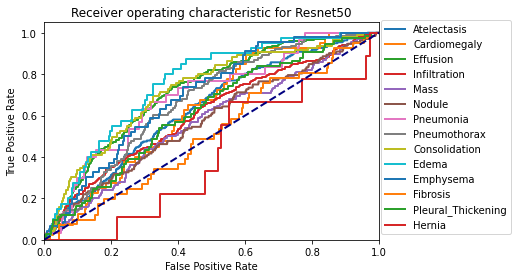

In [54]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_resnet[l], tpr_resnet[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Resnet50')
plt.show()

# ResNet SGD with Momentum ROC
use the merged dataframe and get True positive rate and False positive rate

In [55]:
fpr_resnet_mom = dict()
tpr_resnet_mom = dict()
roc_auc_resnet_mom = dict()

In [56]:
for label in labels:
    fpr_resnet_mom[label], tpr_resnet_mom[label], _ = roc_curve(df_resnet_mom_merged[[label]].to_numpy(),df_resnet_mom_merged[["prob_" + label]].to_numpy())
    roc_auc_resnet_mom[label] = auc(fpr_resnet_mom[label], tpr_resnet_mom[label])

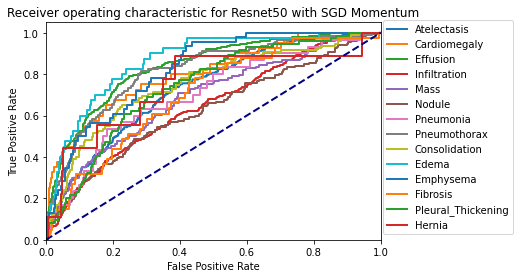

In [57]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_resnet_mom[l], tpr_resnet_mom[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Resnet50 with SGD Momentum')
plt.show()

# DenseNet With Momentum ROC
use the merged dataframe and get True positive rate and False positive rate

In [58]:
fpr_densenet = dict()
tpr_densenet = dict()
roc_auc_densenet = dict()

In [59]:
for label in labels:
    fpr_densenet[label], tpr_densenet[label], _ = roc_curve(df_densenet_merged[[label]].to_numpy(),df_densenet_merged[["prob_" + label]].to_numpy())
    roc_auc_densenet[label] = auc(fpr_densenet[label], tpr_densenet[label])

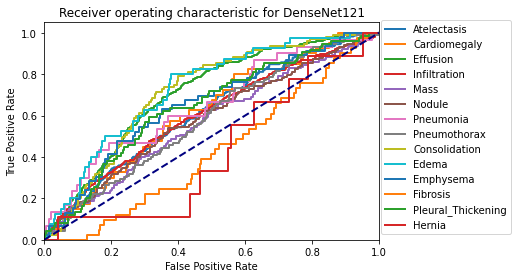

In [60]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_densenet[l], tpr_densenet[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for DenseNet121')
plt.show()

# DenseNet With Momentum ROC
use the merged dataframe and get True positive rate and False positive rate

In [61]:
fpr_densenet_mom = dict()
tpr_densenet_mom = dict()
roc_auc_densenet_mom = dict()

In [62]:
for label in labels:
    fpr_densenet_mom[label], tpr_densenet_mom[label], _ = roc_curve(df_densenet_mom_merged[[label]].to_numpy(),df_densenet_mom_merged[["prob_" + label]].to_numpy())
    roc_auc_densenet_mom[label] = auc(fpr_densenet_mom[label], tpr_densenet_mom[label])

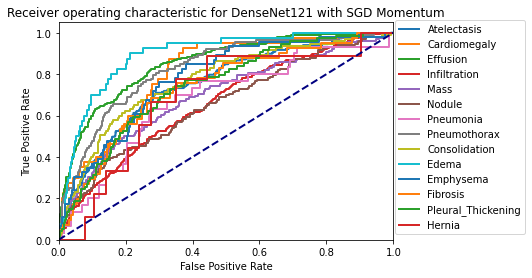

In [63]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_densenet_mom[l], tpr_densenet_mom[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for DenseNet121 with SGD Momentum')
plt.show()

# ResNet Full Dataset ROC
use the merged dataframe and get True positive rate and False positive rate

In [64]:
fpr_resnet_fd = dict()
tpr_resnet_fd = dict()
roc_auc_resnet_fd = dict()

In [65]:
for label in labels:
    fpr_resnet_fd[label], tpr_resnet_fd[label], _ = roc_curve(df_resnet_fd_merged[[label]].to_numpy(),df_resnet_fd_merged[["prob_" + label]].to_numpy())
    roc_auc_resnet_fd[label] = auc(fpr_resnet_fd[label], tpr_resnet_fd[label])

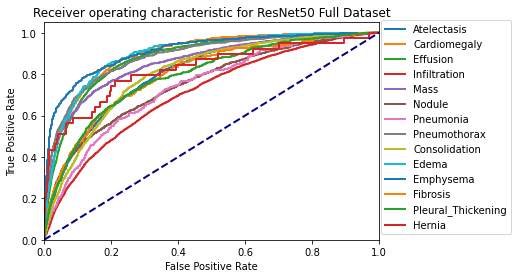

In [66]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_resnet_fd[l], tpr_resnet_fd[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for ResNet50 Full Dataset')
plt.show()

# DenseNet Full Dataset ROC
use the merged dataframe and get True positive rate and False positive rate

In [67]:
fpr_densenet_fd = dict()
tpr_densenet_fd = dict()
roc_auc_densenet_fd = dict()

In [68]:
for label in labels:
    fpr_densenet_fd[label], tpr_densenet_fd[label], _ = roc_curve(df_densenet_fd_merged[[label]].to_numpy(),df_densenet_fd_merged[["prob_" + label]].to_numpy())
    roc_auc_densenet_fd[label] = auc(fpr_densenet_fd[label], tpr_densenet_fd[label])

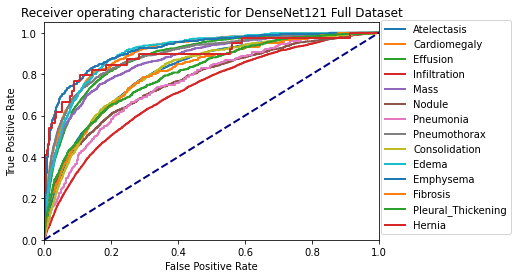

In [160]:
plt.figure()
for l in labels:
    lw = 2
    plt.plot(fpr_densenet_fd[l], tpr_densenet_fd[l],
         lw=lw, label= l )
    
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for DenseNet121 Full Dataset')
plt.show()

# ResNet Full Dataset Training/Validation Loss and AUC values

In [148]:
res_val_loss = pd.read_csv("ResNet/val_epochs_loss.csv")
res_train_loss = pd.read_csv("ResNet/train_epochs_loss.csv")

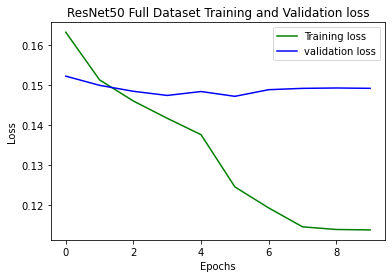

In [149]:
loss_train = res_train_loss['Loss']
loss_val = res_val_loss['Loss']
epochs = res_val_loss['Epoch No']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('ResNet50 Full Dataset Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [150]:
llabels = ['Atelectasis',
            'Cardiomegaly',
            'Effusion',
            'Infiltration',
            'Mass',
            'Nodule',
            'Pneumonia',
            'Pneumothorax'
            ]

In [151]:
df_auc_epoch = pd.DataFrame(columns=llabels)
for epoch in range(0,10):
    temp_df = pd.read_csv("ResNet/" + str(epoch) + "_ResNetaucsSGDMomentum.csv")
    trow ={}
    trow['epoch'] = epoch
    for index, row in temp_df.iterrows():

        if row['label'] in llabels:
            trow[row['label']] = row['auc']
         
    df_auc_epoch = df_auc_epoch.append(trow, ignore_index=True)
    trow ={}    
            

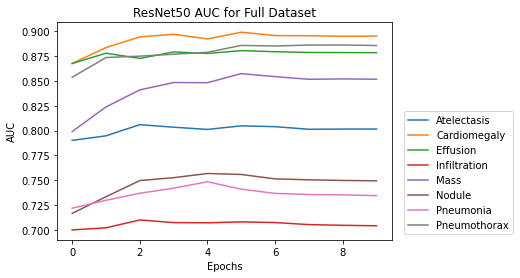

In [152]:
for label in llabels:
    auc = df_auc_epoch[label]
    epochs = df_auc_epoch['epoch']
    plt.plot(epochs, auc, label=label)

plt.title('ResNet50 AUC for Full Dataset')
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

# DenseNet Full Dataset Training/Validation Loss and AUC values

In [153]:
dense_val_loss = pd.read_csv("DenseNet/val_epochs_loss.csv")
dense_train_loss = pd.read_csv("DenseNet/train_epochs_loss.csv")

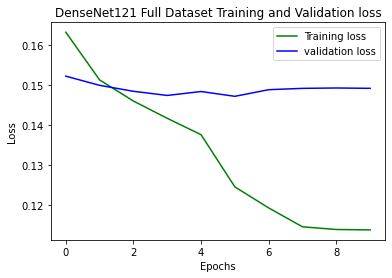

In [154]:
loss_train = res_train_loss['Loss']
loss_val = res_val_loss['Loss']
epochs = res_val_loss['Epoch No']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('DenseNet121 Full Dataset Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [155]:
llabels = ['Atelectasis',
            'Cardiomegaly',
            'Effusion',
            'Infiltration',
            'Mass',
            'Nodule',
            'Pneumonia',
            'Pneumothorax'
            ]

In [158]:
df_auc_epoch = pd.DataFrame(columns=llabels)
for epoch in range(0,10):
    temp_df = pd.read_csv("DenseNet/" + str(epoch) + "_DenseNetaucsSGDMomentum.csv")
    trow ={}
    trow['epoch'] = epoch
    for index, row in temp_df.iterrows():

        if row['label'] in llabels:
            trow[row['label']] = row['auc']
         
    df_auc_epoch = df_auc_epoch.append(trow, ignore_index=True)
    trow ={}    
            

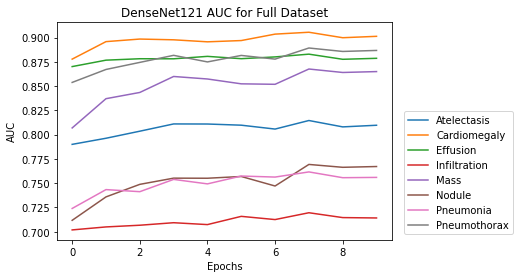

In [159]:
for label in llabels:
    auc = df_auc_epoch[label]
    epochs = df_auc_epoch['epoch']
    plt.plot(epochs, auc, label=label)

plt.title('DenseNet121 AUC for Full Dataset')
plt.legend(loc="lower center", bbox_to_anchor=(1.20, 0.003), ncol= 1)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

# Visualize Class Activation Mapping for Trained ResNet50 Model 
Load the trained model and use it for Class Activation Mapping

In [200]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms
import PIL
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
from torch.utils.data import Dataset
import os
from PIL import Image
from torchvision import transforms

In [201]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [202]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
BATCH_SIZE = 32

In [203]:
data_transforms = {
        'train': transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.Resize(224),

            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ]),
        'val': transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ]),
    }

In [204]:
class CustomDataset(Dataset):

    def __init__(self,path_to_images,labelcsv,transform=None):

        self.transform = transform
        self.path_to_images = path_to_images
        self.df = pd.read_csv(labelcsv)

        self.df = self.df.set_index("Image Index")
        self.PRED_LABEL = [
            'Atelectasis',
            'Cardiomegaly',
            'Effusion',
            'Infiltration',
            'Mass',
            'Nodule',
            'Pneumonia',
            'Pneumothorax',
            'Consolidation',
            'Edema',
            'Emphysema',
            'Fibrosis',
            'Pleural_Thickening',
            'Hernia']

        RESULT_PATH = "results/"

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image = Image.open(
            os.path.join(
                self.path_to_images,
                self.df.index[idx]))
        image = image.convert('RGB')

        label = np.zeros(len(self.PRED_LABEL), dtype=int)
        for i in range(0, len(self.PRED_LABEL)):
            if(self.df[self.PRED_LABEL[i].strip()].iloc[idx].astype('int') > 0):
                label[i] = self.df[self.PRED_LABEL[i].strip()
                                   ].iloc[idx].astype('int')

        if self.transform:
            image = self.transform(image)

        return (image, label,self.df.index[idx])
    
    

In [205]:
def load_data(data_path=None):

    data_train = CustomDataset(
        path_to_images='/home/ubuntu/payload/NIHData/images/',
        labelcsv = 'train_small_updated.csv',
        transform=data_transforms['train'])
    data_val = CustomDataset(
        path_to_images='/home/ubuntu/payload/NIHData/images/',
        labelcsv = 'val_small_updated.csv',
        transform=data_transforms['val'])

    train_loader = torch.utils.data.DataLoader(data_train, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = torch.utils.data.DataLoader(data_val, batch_size=BATCH_SIZE, shuffle=False)

    return train_loader, val_loader , data_train , data_val

In [206]:
train_loader, val_loader , train_dataset , val_dataset = load_data()

In [207]:

checkpoint_best = torch.load('ResNet/checkpoint')
model = checkpoint_best['model']
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [208]:
configs = [
    dict(model_type='resnet', arch=model, layer_name='layer4')
]
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [209]:

img_dir = '/home/ubuntu/payload/NIHData/images'

img_name = '00019627_000.png'
img_path = os.path.join(img_dir, img_name)

pil_img = PIL.Image.open(img_path)
pil_img = pil_img.convert('RGB')
torch_img = transforms.Compose([
   
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(pil_img).to(device)

data = next(iter(val_loader))
normed_torch_img = data[0][0].unsqueeze(0)
normed_torch_img = normed_torch_img.to(device)

In [210]:
from torchvision.utils import make_grid, save_image

images = []
for gradcam, gradcam_pp in cams:
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    
    images.extend([torch_img.cpu(), heatmap, heatmap_pp, result, result_pp])
    
grid_image = make_grid(images, nrow=5)

/home/ubuntu/miniconda3/envs/dvproject_venv/lib/python3.8/site-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


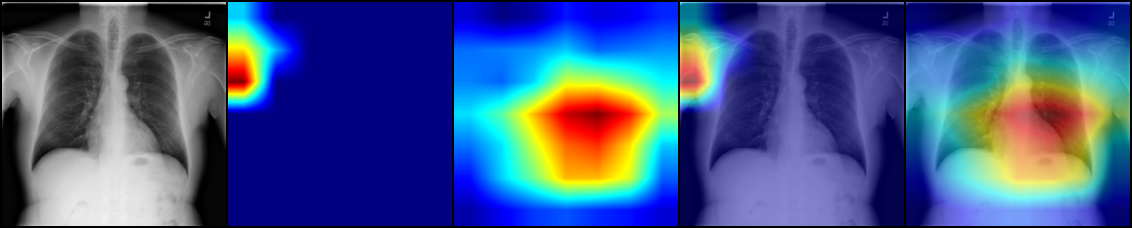

In [215]:


transforms.ToPILImage()(grid_image)